# 下载基金排行
需要下载http://fund.eastmoney.com/data/fundranking.html#tgp;c0;r;s1nzf;pn50;ddesc;qsd20210926;qed20220926;qdii;zq;gg;gzbd;gzfs;bbzt;sfbb
上的基金排行到fundrank.csv中

如何将网站上的信息down下来存放在csv中，首先需要了解爬虫，爬虫是如何从网站上爬下来数据，并将数据存放在csv中的。
需要了解下爬虫的知识点
## 编写爬虫的流程
爬虫程序与其他程序不同，它的的思维逻辑一般都是相似的， 所以无需我们在逻辑方面花费大量的时间。下面对 Python 编写爬虫程序的流程做简单地说明：
先由 urllib 模块的 request 方法打开 URL 得到网页 HTML 对象。
使用浏览器打开网页源代码分析网页结构以及元素节点。
通过 Beautiful Soup 或则正则表达式提取数据。
存储数据到本地磁盘或数据库。
## 前端知识
爬虫程序之所以可以抓取数据，是因为爬虫能够对网页进行分析，并在网页中提取出想要的数据。在学习 Python 爬虫模块前，我们有必要先熟悉网页的基本结构，这是编写爬虫程序的必备知识。
如果您熟悉前端语言，那么您可以轻松地掌握本节知识。
网页一般由三部分组成，分别是 HTML（超文本标记语言）、CSS（层叠样式表）和 JavaScript（简称“JS”动态脚本语言），它们三者在网页中分别承担着不同的任务。
* HTML 负责定义网页的内容
* CSS 负责描述网页的布局
* JavaScript 负责网页的行为
由于前端内容太多，爬数据其实爬的是网页内容，所以学习下HTML先

In [ ]:
 <!DOCTYPE html> <!--声明为 HTML5 文档 -->
<html><!--是网页的根元素 -->
<head><!--元素包含了文档的元（meta）数据，如 <meta charset="utf-8"> 定义网页编码格式为 utf-8。 -->
<meta charset="utf-8">
<title>编程帮</title><!--元素描述了文档的标题 -->
</head>
<body><!--表示用户可见的内容 -->
<a href="www.biancheng.net">点击访问</a><!--表示超链接 -->
<h1>编程帮www.biancheng.net</h1><!--标题 -->
<h2>Python爬虫</h2><!--标题 -->
<div><!--表示框架 -->
<p>认识网页结构</p><!--段落 -->
<ul><!--定义无序列表 -->
<li>HTML</li><!--表示列表项 -->
<li>CSS</li><!--表示列表项 -->
</ul>
</div>
</body>
</html>

## 最初的爬虫
一个完整的爬虫由request请求模块来打开网页并返回response
并需要提取响应内容，我们需要读取响应内容并打印内容，例子如下

In [1]:
#导包,发起请求使用urllib库的request请求模块
import urllib.request
# urlopen()向URL发请求,返回响应对象,注意url必须完整
import re
url='http://fund.eastmoney.com/data/fundranking.html#tgp;c0;r;sqjzf;pn10000;ddesc;qsd20210927;qed20220927;qdii;zq;gg;gzbd;gzfs;bbzt;sfbb'
headers = {'User-Agent':'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Mobile Safari/537.36'}
req = urllib.request.Request(url=url,headers=headers)
res = urllib.request.urlopen(req)
# res=urllib.request.urlopen(req)#先由 urllib 模块的 request 方法打开 URL 得到网页 HTML 对象。
# print(res)#打印返回结果
#提取响应内容
html = res.read().decode('utf-8')
#打印响应内容
print(html)#html篇幅过长
re_bds = '<a href="(.*?)" title="(.*?)">(.*?)</a>'
pttn=re.compile(re_bds)
r_list = re.findall(pttn,html)
print(r_list)


URLError: <urlopen error [Errno 61] Connection refused>

### 常用方法
在本节您认识了第一个爬虫库 urllib，下面关于 urllib 做简单总结。
1) urlopen()
表示向网站发起请求并获取响应对象，如下所示：
```python
urllib.request.urlopen(url,timeout)
```
urlopen() 有两个参数，说明如下：
url：表示要爬取数据的 url 地址。
timeout：设置等待超时时间，指定时间内未得到响应则抛出超时异常。
2) Request()
该方法用于创建请求对象、包装请求头，比如重构 User-Agent（即用户代理，指用户使用的浏览器）使程序更像人类的请求，而非机器。重构 User-Agent 是爬虫和反爬虫斗争的第一步。在下一节会做详细介绍。
```python
urllib.request.Request(url,headers)
```
参数说明如下：
url：请求的URL地址。
headers：重构请求头。

3) html响应对象方法
```python
bytes = response.read() # read()返回结果为 bytes 数据类型
string = response.read().decode() # decode()将字节串转换为 string 类型
url = response.geturl() # 返回响应对象的URL地址
code = response.getcode() # 返回请求时的HTTP响应码
```
4) 编码解码操作
```python
#字符串转换为字节码
string.encode("utf-8") 
#字节码转换为字符串
bytes.decode("utf-8") 
```

In [51]:
from urllib import request
import re
import time
import random
import csv
from ua_info import ua_list
# 定义一个爬虫类
class MaoyanSpider(object): 
    # 初始化
    # 定义初始页面url
    def __init__(self):
        self.url = 'https://www.maoyan.com/board/4?offset={}'
    
    # 请求函数
    def get_html(self,url):
        headers = {'User-Agent':random.choice(ua_list)}
        req = request.Request(url=url,headers=headers)
        res = request.urlopen(req)
        html = res.read().decode()
        # 直接调用解析函数
        self.parse_html(html)
    
    # 解析函数
    def parse_html(self,html):
        # 正则表达式
        # '<div class="movie-item-info"><a href="/films/.*" title="(.*?)" data-act="boarditem-click" data-val="{movieId:.*?}">(.*?)</a><p class="name"></p><p class="star">(.*?)</p><p class="releasetime">(.*?)</p>'
        # '<a href="/films/1200486" title="我不是药神" data-act="boarditem-click" data-val="{movieId:1200486}">我不是药神</a>'
        re_bds = '<div class="movie-item-info"><a href="/films/.*" title="(.*?)" data-act="boarditem-click" data-val="{movieId:.*?}">(.*?)</a><p class="name"></p><p class="star">(.*?)</p><p class="releasetime">(.*?)</p>'
        # 生成正则表达式对象
        pattern = re.compile(re_bds,re.S)
        # r_list: [('我不是药神','徐峥,周一围,王传君','2018-07-05'),...] 列表元组
        r_list = pattern.findall(html)
        self.save_html(r_list)
    # 保存数据函数，使用python内置csv模块
    def save_html(self,r_list):
        #生成文件对象  
        with open('maoyan.csv','a',newline='',encoding="utf-8") as f:
            #生成csv操作对象
            writer = csv.writer(f)
            #整理数据
            for r in r_list:
                name = r[0].strip()
                star = r[1].strip()[3:]
                # 上映时间：2018-07-05
                # 切片截取时间
                time = r[2].strip()[5:15]
                L = [name,star,time]
                # 写入csv文件
                writer.writerow(L)
                print(name,time,star)
    # 主函数
    def run(self):
        #抓取第一页数据
        for offset in range(0,11,10):
            url = self.url.format(offset)
            self.get_html(url)
            #生成1-2之间的浮点数
            time.sleep(random.uniform(1,2))
# 以脚本方式启动
if __name__ == '__main__':
    #捕捉异常错误
    try:
        spider = MaoyanSpider()
        spider.run()
    except Exception as e:
        print("错误:",e)

错误: HTTP Error 302: The HTTP server returned a redirect error that would lead to an infinite loop.
The last 30x error message was:
Found


In [6]:
#导入parse模块
from urllib import parse
#构建查询字符串字典
query_string = {
'wd' : '天天'
}
#调用parse模块的urlencode()进行编码
result = parse.urlencode(query_string)
#使用format函数格式化字符串，拼接url地址
url = 'http://www.baidu.com/s?{}'.format(result)
print(url)

http://www.baidu.com/s?wd=%E5%A4%A9%E5%A4%A9


In [ ]:
from urllib import request,parse
# 1.拼url地址
url = 'http://www.baidu.com/s?wd={}'
word = input('请输入搜索内容:')
params = parse.quote(word)
full_url = url.format(params)
# 2.发请求保存到本地
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:6.0) Gecko/20100101 Firefox/6.0'}
req = request.Request(url=full_url,headers=headers)
res = request.urlopen(req)
html = res.read().decode('utf-8')
# 3.保存文件至当前目录
filename = word + '.html'
with open(filename,'w',encoding='utf-8') as f:
    f.write(html)

re模块常用方法
--------

#### 1) re.compile()

该方法用来生成正则表达式对象，其语法格式如下：
```python
regex=re.compile(pattern,flags=0)
```
参数说明：

-   pattern：正则表达式对象。
-   flags：代表功能标志位，扩展正则表达式的匹配。

#### 2) re.findall()

根据正则表达式匹配目标字符串内容。
```python
re.findall(pattern,string,flags=0)
```
该函数的返回值是匹配到的内容列表，如果正则表达式有子组，则只能获取到子组对应的内容。参数说明如下：

-   pattern：正则表达式对象。
-   string：目标字符串
-   flags：代表功能标志位，扩展正则表达式的匹配。

#### 3) regex.findall()

该函数根据正则表达式对象匹配目标字符串内容。其语法格式如下：
```python
regex.findall(string,pos,endpos)
```
参数说明：

-   string 目标字符串。
-   pos 截取目标字符串的开始匹配位置。
-   endpos 截取目标字符串的结束匹配位置。

#### 4) re.split()

该函数使用正则表达式匹配内容，切割目标字符串。返回值是切割后的内容列表。参数说明：
```python
re.split(pattern,string,flags = 0)
```
参数说明：

-   pattern：正则表达式。
-   string：目标字符串。
-   flags：功能标志位,扩展正则表达式的匹配。

5) re.sub\
该函数使用一个字符串替换正则表达式匹配到的内容。返回值是替换后的字符串。其语法格式如下：
```python
re.sub(pattern,replace,string,max,flags = 0)
```
其参数说明：

-   pattern：正则表达式。
-   replace：替换的字符串。
-   string：目标字符串。
-   max：最多替换几处，默认替换全部，
-   flags：功能标志位,扩展正则表达式的匹配。

#### 5) re.search()

匹配目标字符串第一个符合的内容，返回值为匹配的对象。语法格式如下：

```python
re.search(pattern,string,flags=0)
```

参数说明：

-   pattern：正则表达式
-   string：目标字符串

flags功能标志位
----------

功能标志位的作用是扩展正则表达的匹配功能。常用的 flag 如下所示：

flag功能标志位
| 缩写元字符 | 说明 |
| A | 元字符只能匹配 ASCII码。 |
| I | 匹配忽略字母大小写。 |
| S | 使得`.`元字符可以匹配换行符。 |
| M | 使 ^ $ 可以匹配每一行的开头和结尾位置。 |\
注意：可以同时使用福多个功能标志位，比如 flags=re.I|re.S。


In [31]:
import re
import regex
str ='violation_ad_spend_amt_28d_total DECIMAL(18,2) COMMENT \'违规广告近28日总消耗 - 大盘分子\''
pttn = re.compile(r'\d+')
str2 = re.findall(pttn,str)#找到所有匹配元素
print(str)
print(str2)
str3= re.split(pttn,str,flags = 0)#按照正则进行分割
print(str3)
str4=re.sub(pttn,'fuck',str,2)
print(str4)
str5 = re.search(pttn,str,flags=0)#返回第一个匹配所在的位置
print(str5)

violation_ad_spend_amt_28d_total DECIMAL(18,2) COMMENT '违规广告近28日总消耗 - 大盘分子'
['28', '18', '2', '28']
['violation_ad_spend_amt_', 'd_total DECIMAL(', ',', ") COMMENT '违规广告近", "日总消耗 - 大盘分子'"]
violation_ad_spend_amt_fuckd_total DECIMAL(fuck,2) COMMENT '违规广告近28日总消耗 - 大盘分子'
<re.Match object; span=(23, 25), match='28'>


## csv写入

In [32]:
import csv
with open('names.csv', 'w', newline='') as csvfile:
    #构建字段名称，也就是key
    fieldnames = ['first_name', 'last_name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    # 写入字段名，当做表头
    writer.writeheader()
    # 多行写入
    writer.writerows([{'first_name': 'Baked', 'last_name': 'Beans'},{'first_name': 'Lovely', 'last_name': 'Spam'}])
    # 单行写入
    writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
urls=['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)] #通过观察的url翻页的规律，使用for循环得到10个链接，保存到urls列表中
print(urls)
dic_h = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
comments_list = [] #初始化用于保存短评的列表

for url in urls: #使用for循环分别获取每个页面的数据，保存到comments_list列表
    r = requests.get(url=url,headers = dic_h).text

    soup = BeautifulSoup(r, 'lxml')
    ul = soup.find('div',id="comments")
    lis= ul.find_all('p')

    list2 =[]
    for li in lis:
        list2.append(li.find('span').string)
    # print(list2)
    comments_list.extend(list2)
    time.sleep(random.randint(0,3)) # 暂停0~3秒
    
with open('lhy_comments.txt', 'w', encoding='utf-8') as f: #使用with open()新建对象f
    # 将列表中的数据循环写入到文本文件中
    for i in comments_list:
        f.write(i+"\n") #写入数据

['https://movie.douban.com/subject/34841067/comments?start=0&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=20&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=40&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=60&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=80&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=100&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=120&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=140&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=160&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=180&limit=20&status=P&sort=new_score']


In [20]:
import requests
from bs4 import BeautifulSoup
import time
import random
urls=['https://movie.douban.com/subject/34841067/comments?start={}&limit=20&status=P&sort=new_score'.format(str(i)) for i in range(0, 200, 20)] #通过观察的url翻页的规律，使用for循环得到10个链接，保存到urls列表中
print(urls)
dic_h = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"}
comments_list = [] #初始化用于保存短评的列表

for url in urls: #使用for循环分别获取每个页面的数据，保存到comments_list列表
    r = requests.get(url=url,headers = dic_h).text

    soup = BeautifulSoup(r, 'lxml')
    ul = soup.find('div',id="comments")
    lis= ul.find_all('p')

    list2 =[]
    for li in lis:
        list2.append(li.find('span').string)
    # print(list2)
    comments_list.extend(list2)
    time.sleep(random.randint(0,3)) # 暂停0~3秒
    
with open('lhy_comments.txt', 'w', encoding='utf-8') as f: #使用with open()新建对象f
    # 将列表中的数据循环写入到文本文件中
    for i in comments_list:
        f.write(i+"\n") #写入数据

['https://movie.douban.com/subject/34841067/comments?start=0&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=20&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=40&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=60&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=80&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=100&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=120&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=140&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=160&limit=20&status=P&sort=new_score', 'https://movie.douban.com/subject/34841067/comments?start=180&limit=20&status=P&sort=new_score']


In [22]:
import jieba
import wordcloud
# 读取文本
with open("lhy_comments.txt",encoding="utf-8") as f:
    s = f.read()
print(s)
ls = jieba.lcut(s) # 生成分词列表
text = ' '.join(ls) # 连接成字符串


stopwords = ["的","是","了"] # 去掉不需要显示的词

wc = wordcloud.WordCloud(font_path="/Library/Fonts/Songti.ttc",
                         width = 1000,
                         height = 700,
                         background_color='white',
                         max_words=100,stopwords=s)
# msyh.ttc电脑本地字体，写可以写成绝对路径
wc.generate(text) # 加载词云文本
wc.to_file("李焕英1.png") # 保存词云文件

把二十多分钟的小品拉长到两个小时，没有好导演和好剧本还是省省吧。
有笑有泪的，不明白陈赫这个人物有什么作用，完全多余
跟唐人街探案三的分数相比，很明显观众们评判电影的标准不仅在于你拍的好坏，而更在于你拍的态度是否真诚
这次感受注定是感性压倒理性的，所以就不打分了。
贾玲还是适合做小品，她的表演方式、她的叙事能力都更适合能和观众互动的、短小精炼的舞台而不是要被观众一帧一帧检视的电影。更何况她非科班出身，参与电影项目也不多，要执导筒讲故事就更是自曝其短。
这是一部非常开心麻花式的片子，如果你喜欢《夏洛特烦恼》那么可以去看看，如果是抱着宁浩电影的期待那就赶紧睡个回笼觉，或者喝杯咖啡把瞌睡醒醒。
但说一千道一万，《你好李焕英》只能是贾玲来演、贾玲来导，它是贾玲自己的情感寄托和内心牵挂。哪怕在我觉得很尬的场景里，她对母亲的爱意和思念都饱满到要冲出屏幕来逼我落泪。我也确实掉了眼泪，在大年初一这天。
这种情绪不是浓汤宝能兑出来的煽情，哪怕我和她的人生轨迹并不相同，但我也在电影院里体会了一把贾玲的过往青春。
我以为是我在为你圆梦，其实还是你陪着我做了一场好梦。
贾玲水平有限，奈何感情无比真挚。虽然结尾让我哭的稀里哗啦，但也没能改变前半段就是个低配版夏洛特烦恼的状况。
这完全是贾玲拍给自己的作品，不是拍给观众的，充满了个人的执念。
你以为你已经很爱很爱妈妈了，但妈妈远比你想象中更爱更爱更爱你
贾玲哭的时候很明显没有在演戏，这是最让人伤心的。
前一个小时强行塞包袱，后面干嚎占二十分钟。。。
我不喜欢，我不觉得好笑，也不觉得感动
以为穿越是为了改变她的人生轨迹，竟然只是了却自己的遗憾。原来从天而降的大胖妞无论有多重，她都会毫不犹豫接住她的宝儿。裤子无论多破，她都会缝成小狗。今生母女一场，只能化作目送。以为她希望我有出息，原来她只需要我平安。以为她想换个女儿，原来她从没后悔。以为多了解她，原来还是误会了她。
7分。豆瓣8.2分过分了，就电影论电影的话，贾玲这部作品最大的问题在于它不太像电影（但也确实比小品形态提升了不少）。如果无视这一点，主要凭是否感动或者哭了多少眼泪来评价它的优劣，那就好比让情色片与AV同台竞技，主要凭观众生理反应的指标来评价优劣。 
同样是女性导演的亲情题材，许鞍华《桃姐》8.3分，张艾嘉《相爱相亲》8.4分，就是把贾玲纪念母亲的真诚用心全算上，它跟蒋雯丽《我们天上见》

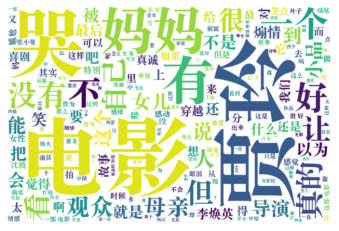

In [25]:
# 示例代码
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba

# 打开文本
with open("lhy_comments.txt",encoding="utf-8") as f:
    s = f.read()

# 中文分词
text = ' '.join(jieba.cut(s))

# 生成对象
img = Image.open("/Users/chenqiang/Documents/the-craft-of-selfteaching/images/code-review.png") # 打开遮罩图片
mask = np.array(img) #将图片转换为数组

stopwords = ["我","你","她","的","是","了","在","也","和","就","都","这"]
wc = WordCloud(font_path="/Library/Fonts/Songti.ttc",
               mask=mask,
               width = 1000,
               height = 700,
               background_color='white',
               max_words=200,
               stopwords=stopwords).generate(text)

# 显示词云
plt.imshow(wc, interpolation='bilinear')# 用plt显示图片
plt.axis("off")  # 不显示坐标轴
plt.show() # 显示图片

# 保存到文件
wc.to_file("李焕英2.png")